In [1]:
%load_ext autoreload
%autoreload 2
# provide cell timings
%load_ext autotime
from qdef import *
%config Completer.use_jedi = False
import sympy as sp
# sp.init_session(quiet=True)
from itertools import product
import re
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

Reloading /Volumes/GoogleDrive/My Drive/Zia Lab/Codebase/qdef/data/CPGs.pkl ...


In [2]:
group = CPGs.get_group_by_label('O')

# For the coefficients as of Nov 10, compare with G2.23

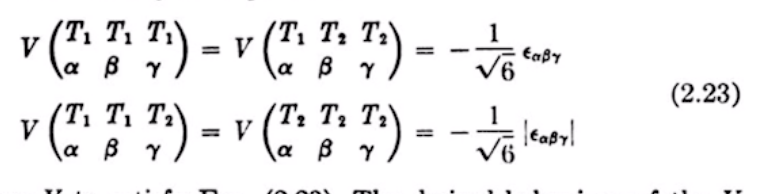

In [48]:
irrep_trios = [tuple(map(sp.Symbol,'T_1 T_1 T_1'.split(' '))),
              tuple(map(sp.Symbol,'T_1 T_2 T_2'.split(' '))),
              tuple(map(sp.Symbol,'T_1 T_1 T_2'.split(' '))),
              tuple(map(sp.Symbol,'T_2 T_2 T_2'.split(' ')))]
for irrep_trio in irrep_trios:
    T1T1T1Vs = [(k,v) for k,v in group.V_coefficients.items() if k[:3] == irrep_trio]
    T1T1T1Vs = sorted(T1T1T1Vs,key=lambda x:str(x[0]))
    counter = 0
    chunks = []
    columns = 4
    for k,v in T1T1T1Vs:
        if v == 0:
            continue
        chunks.append(r'\binom{%s,%s,%s}{%s,%s,%s} = %s' % (*k[:3],*k[3:], sp.latex(v)))
        if counter % columns == (columns-1):
            display(Math(', '.join(chunks)))
            chunks = []
        counter += 1
    else:
        if len(chunks) != 0:
            display(Math(', '.join(chunks)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Yep, it checks out. For the top row of G2.23 all the Vees that are in cyclic order are - 1/sqrt(6) and all the ones that aren't are + 1/sqrt(6).

However, for the bottom row all my values are + 1/sqrt(6) whereas in Griffith they are all -1/sqrt(6). The two triples that are on here (T_1, T_1, T_2) and (T_2, T_2, T_2) are even. Why he would choose some of the even values to be negative, I do not know. It certainly seems purposeful in eqn. (2.23).

In [49]:
import itertools
import random
import timeit


list_of_lists = [
    [random.randint(1, 1000) for _ in range(3)]
    for _ in range(7_000)
]


def flatten_chain(iterables):
    return list(itertools.chain.from_iterable(iterables))


def flatten_comp(iterables):
    return [
        item
        for iterable in iterables
        for item in iterable
    ]


def flatten_sum(iterables):
    return sum(iterables, [])


def time(function):
    return max(timeit.repeat(
        f"{function}(list_of_lists)",
        number=50,
        repeat=3,
        globals=globals(),
    ))


print(time("flatten_chain"), "itertools.chain.from_iterable")
print(time("flatten_comp"), "comprehension")
print(time("flatten_sum"), "sum")

0.016114458000174636 itertools.chain.from_iterable
0.03481879100036167 comprehension
8.494320791000064 sum


In [50]:
def flatten_chain(iterables):
    return list(itertools.chain.from_iterable(iterables))

In [55]:
flatten_chain([[1,2],[3,4]])

[1, 2, 3, 4]

In [56]:
nested_list = [[1,2,3], [4,5]]


In [57]:
print(flatten_chain(nested_list))

[1, 2, 3, 4, 5]


In [54]:
from itertools import chain

def flatten_chain(iterables):
    return list(chain.from_iterable(iterables))

In [80]:
def flatten_list(iterables):
    '''
    Given an iterable with nested iterables this returns a list with one
    level of parenthesis flattened out. If the list is
    already (naively) flat it simply returns that.
    '''
    if hasattr(iterables[0], '__iter__'):
        return iterables
    return list(chain.from_iterable(iterables))
    
nested_list = [(1,2,3), [4,5]]

print()

In [81]:
print(flatten_list(nested_list))

[(1, 2, 3), [4, 5]]


In [82]:
flatten_list((1,2,3))

TypeError: 'int' object is not iterable

In [69]:
type([1,2,3][0])

int